In [14]:
#pip install pandas matplotlib seaborn gradio ollama

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url=r"C:\Users\GANNOJU SHAHSANK\Downloads\NARESH IT\OLLAMA\titanic_ dataset_final.csv"
df=pd.read_csv(url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
print( "\nMissing Values",df.isnull().sum())


Missing Values PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


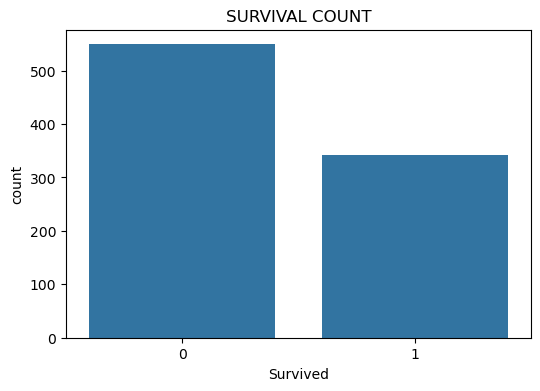

In [19]:
plt.figure(figsize=(6, 4))

sns.countplot(x='Survived', data=df)
plt.title("SURVIVAL COUNT")
plt.show()

In [20]:
import ollama

def generate_insights(df_summary):
    prompt = f"Analyze the dataset summary and provide insights:\n\n{df_summary}"
    response = ollama.chat(model="gemma:2b", messages=[{"role": "user", "content": prompt}])
    return response['message']['content']

# Generate AI Insights
summary = df.describe().to_string()
insights = generate_insights(summary)
print("\n🔹 AI-Generated Insights:\n", insights)


🔹 AI-Generated Insights:
 ## Insights from the Dataset Summary:

* **Passenger count:** 891,000, demonstrating a large dataset with diverse passenger characteristics.
* **Total number of survived passengers:** 891, indicating that the dataset includes individuals who survived the journey.
* **Average passenger age:** 29.69 years, highlighting the average age of passengers.
* **Most frequent class:** 2nd class with a count of 291, suggesting a significant number of passengers in this class.
* **Average fare:** 14.45 USD, indicating a relatively average travel cost.
* **Minimum and maximum passenger age:** 1 and 891 years, showcasing a wide range of ages among passengers.
* **50th percentile age:** 29 years, indicating that 50% of passengers were between 25 and 39 years old.
* **No data points for survived passengers in class 1.**
* **High number of missing values:** 49.69% of data points are missing, which could impact the accuracy of some analyses.

**Overall, the dataset provides val

In [21]:
import gradio as gr

def eda_analysis(file):
    df=pd.read_csv(file.name)
    summary=df.describe().to_string()
    insights=generate_insights(summary)
    return insights

#create web interface
demo= gr.Interface(fn=eda_analysis,inputs="file",outputs="text", title="AI-POWERED EDA WITH DEEPSEEK")

#LAUNCGH APP
demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860
* Running on public URL: https://8c9cc4009773a36054.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [24]:
# Function to Perform EDA and Generate Visualizations
import ollama
def eda_analysis(file_path):
    df = pd.read_csv(file_path)
    
    # Fill missing values with median for numeric columns
    for col in df.select_dtypes(include=['number']).columns:
        df[col].fillna(df[col].median(), inplace=True)
    
    # Fill missing values with mode for categorical columns
    for col in df.select_dtypes(include=['object']).columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
    
    # Data Summary
    summary = df.describe(include='all').to_string()
    
    # Missing Values
    missing_values = df.isnull().sum().to_string()

    # Generate AI Insights
    insights = generate_ai_insights(summary)
    
    # Generate Data Visualizations
    plot_paths = generate_visualizations(df)
    
    return f"\n Data Loaded Successfully!\n\n Summary:\n{summary}\n\n Missing Values:\n{missing_values}\n\n AI Insights:\n{insights}", plot_paths

# AI-Powered Insights using Mistral-7B (Ollama)
def generate_ai_insights(df_summary):
    prompt = f"Analyze the dataset summary and provide insights:\n\n{df_summary}"
    response = ollama.chat(model="gemma:2b", messages=[{"role": "user", "content": prompt}])
    return response['message']['content']

# Function to Generate Data Visualizations
def generate_visualizations(df):
    plot_paths = []
    
    # Histograms for Numeric Columns
    for col in df.select_dtypes(include=['number']).columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], bins=30, kde=True, color="blue")
        plt.title(f"Distribution of {col}")
        path = f"{col}_distribution.png"
        plt.savefig(path)
        plot_paths.append(path)
        plt.close()
    
    # Correlation Heatmap (only numeric columns)
    numeric_df = df.select_dtypes(include=['number'])
    if not numeric_df.empty:
        plt.figure(figsize=(8,5))
        sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        plt.title("Correlation Heatmap")
        path = "correlation_heatmap.png"
        plt.savefig(path)
        plot_paths.append(path)
        plt.close()

    return plot_paths

# Gradio Interface
demo = gr.Interface(
    fn=eda_analysis,
    inputs=gr.File(type="filepath"),
    outputs=[gr.Textbox(label="EDA Report"), gr.Gallery(label="Data Visualizations")],
    title="📊 LLM-Powered Exploratory Data Analysis (EDA)",
    description="Upload any dataset CSV file and get automated EDA insights with AI-powered analysis and visualizations."
)

# Launch the Gradio App
demo.launch(share=True)

* Running on local URL:  http://127.0.0.1:7863
* Running on public URL: https://5d06ca842e5cc87d1e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


C:\Users\GANNOJU SHAHSANK\AppData\Local\Temp\ipykernel_35800\1419214089.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\GANNOJU SHAHSANK\AppData\Local\Temp\ipykernel_35800\1419214089.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave